https://iopscience.iop.org/article/10.1088/1555-6611/aaf63d 
H Ahmad et al 2019 Laser Phys. 29 025301

First, construct the geometry of the waveguide and create a mesh. Then generate the effective refractive index and effective mode area of the waveguide using femwell.

start


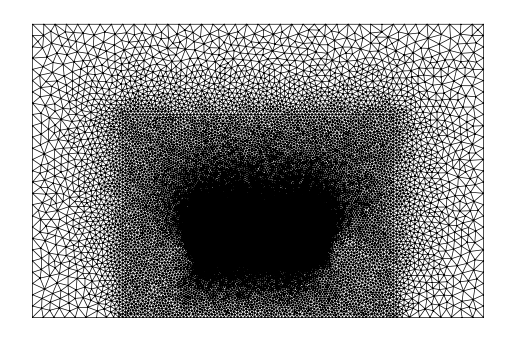

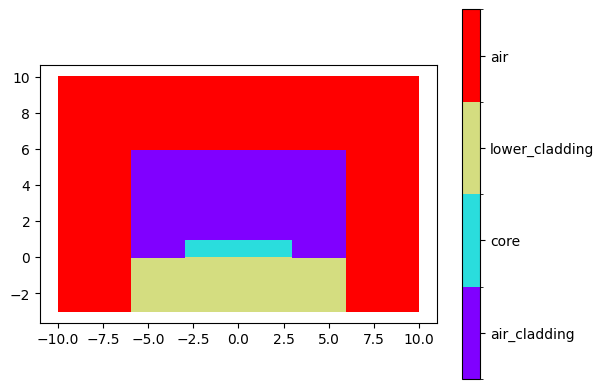

  0%|          | 0/100 [00:07<?, ?it/s]


KeyboardInterrupt: 

In [17]:
import shapely
from generate_neff_and_aeff import get_neff_and_aeff
from refractive_index import n_MgF2, n_Si3N4, n_Air
from collections import OrderedDict
import numpy as np

# waveguide parameters
width = 6 # um
height = 1 # um

n2 = 2.5e-19     # m^2/W n2 is the nonlinear refractive index at the center
Alpha = 0.7     # loss (dB/cm)

wavelength_range = [207,8000]
wavelegnth_step = 100 # 50nm steps

n_core = n_Si3N4
n_lower_cladding = n_MgF2
n_air = n_Air
#print(n_Si3N4(6))

# Construct waveguide geometry
core = shapely.geometry.box(-width/2, 0, +width/2, height)
lower_cladding = shapely.geometry.box(-width, -3, width, 0)
air_cladding = shapely.geometry.box(-width,0,width,width)
air = shapely.geometry.box(-10,-3,10,10)
polygons = OrderedDict(
    core = core,
    lower_cladding = lower_cladding,
    air_cladding = air_cladding,
    air = air
)

# Define material property and resolution of waveguide
resolutions = dict(core={"resolution": 0.04, "distance": 0.2},
                   air_cladding={"resolution": 0.15, "distance": 0.5},
                   lower_cladding={"resolution": 0.15, "distance": 0.5},
                   air = {"resolution": 0.5, "distance": 1} )

n_dict = {"core": n_core,"lower_cladding":n_lower_cladding ,"air_cladding": n_air, "air":n_air}

print("start")
# Calculate dispersion and gamma
aeff_list, neff_list, wls = get_neff_and_aeff(polygons,n_dict,wavelength_range,wavelegnth_step,resolutions)

##plot data
np.savez(f"data_h_{height}_w_{width}", wls=wls, aeff_list=aeff_list, neff_list=neff_list)

print("end")
print(aeff_list)
print(wls)

[2.48071925 2.24916942 2.14503563 2.11202546 2.07430701 2.0464947
 2.02433565 2.00557854 1.98893715 1.97363422 1.95918    1.9452563
 1.93165199 1.91822533 1.90488107 1.89155603 1.87820967 1.87412689
 1.861587   1.84899849 1.83635851 1.82366938 1.81093751 1.79817259
 1.78538694 1.77259506 1.75981321 1.74705909 1.73435156 1.72171039
 1.70915601 1.6967093  1.68439136 1.67222328 1.66022591 1.6484196
 1.63682398 1.62545767 1.61433799 1.60348072 1.59289977 1.58260692
 1.57261157 1.56292051 1.5535377  1.54446424 1.53569826 1.52723507
 1.51906721 1.51118477]
[ 210.          256.73469388  303.46938776  350.20408163  396.93877551
  443.67346939  490.40816327  537.14285714  583.87755102  630.6122449
  677.34693878  724.08163265  770.81632653  817.55102041  864.28571429
  911.02040816  957.75510204 1004.48979592 1051.2244898  1097.95918367
 1144.69387755 1191.42857143 1238.16326531 1284.89795918 1331.63265306
 1378.36734694 1425.10204082 1471.83673469 1518.57142857 1565.30612245
 1612.04081633 165

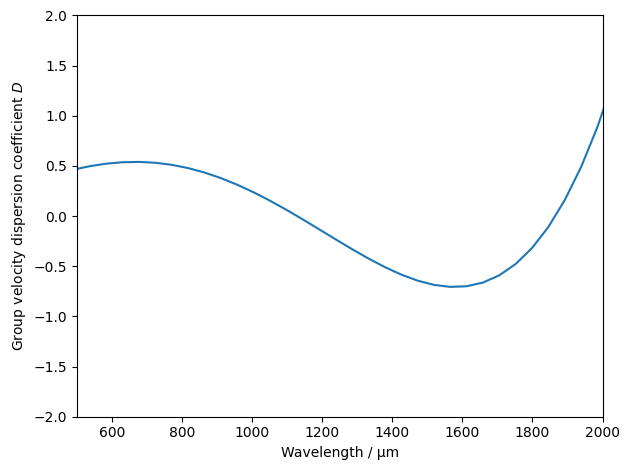

In [9]:

from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light

width = 0.88 # um
height = 0.69 # um

data = np.load(f"data_h_{height}_w_{width}.npz")
neff_list = data['neff_list']
te_frac_list = data['te_frac_list']
wls = data['wls']
print(neff_list)
print(wls)
fig, axs = plt.subplots(1, 1)
axs.set_xlabel("Wavelength / µm")
axs.set_ylabel("Group velocity dispersion coefficient $D$")

fit = Polynomial.fit(wls, neff_list, deg=4)
y = wls**2 * fit.deriv(2)(wls)
axs.plot(wls, y)
axs.set_ylim(-2,2)
axs.set_xlim(500,2000)
plt.tight_layout()
plt.show()

Use laserfun to reproduce the spectrum of Fig 5c


[2.48071413 2.24916311 2.14502796 2.11201608 2.07429605 2.04648214
 2.02432148 2.00556279 1.98891986 1.97361545 1.95915982 1.9452348
 1.93162926 1.91820148 1.90485623 1.89153031 1.87818322 1.87408912
 1.86154891 1.84896023 1.83632021 1.82363118 1.81089956 1.79813502
 1.78534989 1.77255867 1.75977762 1.74702442 1.73431794 1.72167793
 1.70912482 1.69667949 1.68436302 1.67219649 1.66020074 1.64839611
 1.63680221 1.62543764 1.61431972 1.6034642  1.59288499 1.58259385
 1.57260017 1.56291071 1.55352944 1.54445743 1.53569284 1.52723092
 1.51906425 1.5111829 ]
[0.28559365 0.29396631 0.30200581 0.30856708 0.31623556 0.32415593
 0.33241768 0.34110004 0.35027837 0.36002781 0.37042579 0.38155368
 0.3934982  0.40635256 0.42021746 0.43520198 0.4514245  0.45775304
 0.47364785 0.49072485 0.5091048  0.52892007 0.5503158  0.57345092
 0.59849941 0.62565142 0.65511452 0.68711488 0.72189846 0.75973215
 0.80090486 0.84572843 0.8945384  0.94769458 1.00558117 1.06860633
 1.13720101 1.21181641 1.29291986 1.380

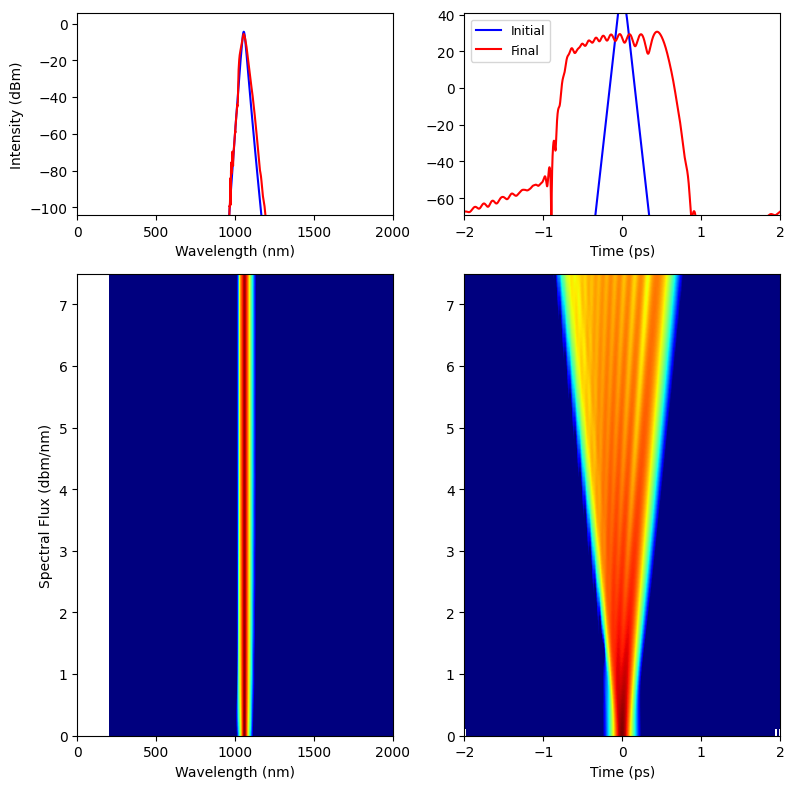

In [4]:

import laserfun as lf
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd

# waveguide parameters
width = 0.88 # um
height = 0.69 # um
length = 7.5 * 1e-3

n2 = 2.4e-19     # m^2/W n2 is the nonlinear refractive index at the center
Alpha = 0.0     # loss (dB/cm)

# pulse parameters
FWHM = 80 * 1e-3  # pulse duration (ps)
pulseWL = 1055  # pulse central wavelength (nm)
frep_MHz = 1.025 * 1e9
epp = 26 * 1e-12
power = 1.8

chirp = 800 *1e-6  #ps^2

GDD = True   # Group delay dispersion (ps^2)
TOD = False  # Third order dispersion (ps^3)
FOD = False  # Fourth order dispersion

# simulation parameters
Window = 4  # simulation window (ps)
Steps = 100  # simulation steps
Points = 2 ** 14  # simulation points
rtol = 1e-4  # relative error for NLSE integrator
atol = 1e-4  # absolute error
Raman = True  # Enable Raman effect?
Steep = True  # Enable self steepening?


data = np.load(f"data_h_{height}_w_{width}.npz")
wls = data['wls']
neff_list = data['neff_list']
aeff_list = data['aeff_list']
print(neff_list)
print(aeff_list)
print(wls)

def disp_function(z=0):  # provide effective index to the NLSE
    return (wls, neff_list)


# Calculate Gamma
def gamma_function(pump_wl):  # provide the nonlinearity at the pump to the NLSE
    aeff_interp = scipy.interpolate.interp1d(wls, aeff_list)
    gamma = 2 * np.pi * n2 / (pump_wl * 1e-9 * aeff_interp(pump_wl) * 1e-12)
    return gamma

# create the pulse:
p = lf.Pulse(pulse_type='sech', fwhm_ps=FWHM, center_wavelength_nm=pulseWL,
             time_window_ps=Window, power_is_avg=True,power= power, wav=wls,RI=neff_list, GDD=GDD,TOD=TOD, FOD=FOD, npts=Points, epp = epp)
p.chirp_pulse_W(chirp)

# create the waveguide
f = lf.Fiber(length, center_wl_nm=pulseWL, dispersion_format='GVD',
             gamma_W_m=gamma_function(pulseWL), loss_dB_per_m=Alpha * 100)

f.set_dispersion_function(disp_function, dispersion_format='n')

# propagate the pulse using the NLSE
results = lf.NLSE(p, f, raman=Raman, shock=Steep, nsaves=Steps, rtol=rtol,
                  atol=atol, print_status=True)
#Plot adjusting


fig, axes = results.plot(wavelength=True, show=False, tlim=(-2, 2), flim=(0, 2000), wmax = 8000, wmin = 200)

plt.set_cmap('jet')
plt.show()

Problem
